---
# Assignment 1
# Computer performance, reliability, and scalability calculation
# Michael Hotaling
---

## 1.2 

#### a. Data Sizes

| Data Item                                  | Size per Item                           | Sources                  |
|--------------------------------------------|----------------------------------------:|------------------------:|
| 128 character message.                     | 112 - 128 Bytes assuming ASCII encoding* |      [Source](https://toolstud.io/photo/megapixel.php?width=1024&height=768&compare=video&calculate=compressed#calculate)     |
| 1024x768 PNG image                         | 1.5 MB on average*                      |      [Source](https://toolstud.io/photo/megapixel.php?width=1024&height=768&compare=video&calculate=compressed#calculate)     |
| 1024x768 RAW image                         | 3MB                                     |      [Source](https://toolstud.io/photo/megapixel.php?width=1024&height=768&compare=video&calculate=uncompressed#calculate)   |
| HD (1080p) HEVC Video (15 minutes)         | 300 MB                                  |      [Source](https://toolstud.io/video/filesize.php?dimensions_w=1920&dimensions_h=1080&framerate=29.97&timeduration=15&timeduration_unit=minutes)   |
| HD (1080p) Uncompressed Video (15 minutes) | 8120 MB                                 |      [Source](https://toolstud.io/video/filesize.php?dimensions_w=1920&dimensions_h=1080&framerate=29.97&timeduration=15&timeduration_unit=minutes)                   |
| 4K UHD HEVC Video (15 minutes)             | 1260 MB                                 |      [Source](https://toolstud.io/video/filesize.php?dimensions_w=3840&dimensions_h=2160&framerate=29.97&timeduration=15&timeduration_unit=minutes)                   |
| 4k UHD Uncompressed Video (15 minutes)     | 76441MB                                 |      [Source](https://toolstud.io/video/filesize.php?dimensions_w=3840&dimensions_h=2160&framerate=29.97&timeduration=15&timeduration_unit=minutes)   |
| Human Genome (Uncompressed)                | 200 GB                                  |  [Source](https://medium.com/precision-medicine/how-big-is-the-human-genome-e90caa3409b0)                       |

#### b. Scaling
Assuming 1TB hard drives are in use and no redundancy is set up. In normal cases, RAID is utilized to prevent data loss in case of hard drive failures, so multiple disks will be used for storage. I'll be assuming no redundnancy. To factor in redundancy, mulitplying the number of HDs by 2 should be a good estimate

|                                           | Size     | # HD | Sources   |
|-------------------------------------------|---------:|-----:|----------:|
| Daily Twitter Tweets (Uncompressed)       | 93GB     | 1    |[Tweets/day](https://www.dsayce.com/social-media/tweets-day/) + [Memory/Tweet](https://stackoverflow.com/questions/5999821/how-many-bytes-of-memory-is-a-tweet/5999852)           | 
| Daily Twitter Tweets (Snappy Compressed)  | 58GB     | 1    | [Snappy at 1.6 compression ratio](https://bestofcpp.com/repo/lz4-lz4-cpp-compression)          |
| Daily Instagram Photos                    | 25TB     | 25    | [995 photos/second](https://wouldyouhavethought.com/live-stats/photos-uploaded-on-instagram) + [2-4MB per Image](https://www.proximus.be/en/id_b_cr_data_usage_instagram/personal/blog/news/tips-and-tricks-from/data-usage-instagram.html)          |
| Daily YouTube Videos                      | 3037 TB  | 3000   |  [720,000 Hours Video Uploaded Daily ](https://www.oberlo.com/blog/youtube-statistics) + [4.32GB per Hour](https://toolstud.io/video/filesize.php?width=1920&height=1080&framerate=29.97&timeduration=1&timeduration_unit=hours&compression=19290&specificbitrate=100&specificbitrate_unit=1000000)         |
| Yearly Twitter Tweets (Uncompressed)      | 32TB       | 32      |  Previous x 365         |
| Yearly Twitter Tweets (Snappy Compressed) | 20TB       | 20     |   Previous x 365        |
| Yearly Instagram Photos                   | 9125TB     |9125      | Previous x 365          |
| Yearly YouTube Videos                     | 1082PB     |1108687      |    Previous x 365       |

#### c. Reliability


Assuming annualized failure rate of [0.81%](https://www.backblaze.com/blog/backblaze-hard-drive-stats-q2-2020/)

|                                    | # HD   | # Failures per Year |
|------------------------------------|-------:|--------------------:|
| Twitter Tweets (Uncompressed)      | 32     | 0.1                 |
| Twitter Tweets (Snappy Compressed) | 20     | 0.1                 |
| Instagram Photos                   | 9125   | 74                  |
| YouTube Videos                     | 1108687| 891                 |

#### d. Latency

|                           | One Way Latency      | Sources              |
|---------------------------|---------------------:|---------------------:|
| Los Angeles to Amsterdam  | 70 ms                | [Average Ping / 2 ](https://wondernetwork.com/pings/Los%20Angeles/Amsterdam)                 |
| Low Earth Orbit Satellite | 0.04 ms              | [Assuming 1000km Distance from Surface](https://www.omniaccess.com/leo/)                     |
| Geostationary Satellite   | 60 ms                 | [Assuming 36,000km Distance from Surface](https://www.omniaccess.com/leo/)                     |
| Earth to the Moon         | 1.3 seconds          | [Earth-Moon Distance/Lightspeed](https://www.wolframalpha.com/input/?i=%28distance+between+earth+and+moon%29%2Fspeed+of+light)                     |
| Earth to Mars             | 19.31 minutes            |  [Earth-Mars Distance/Lightspeed](https://www.wolframalpha.com/input/?i=%28distance+between+earth+and+mars%29%2Fspeed+of+light)                    |

## 1.2

### a. Data Sizes

#### 1) 128 Character Message.

This depends on how the message is encoded:

- An ASCII character in 8-bit ASCII encoding is 8 bits (1 byte), though it can fit in 7 bits.
- An ISO-8895-1 character in ISO-8859-1 encoding is 8 bits (1 byte).
- A Unicode character in UTF-8 encoding is between 8 bits (1 byte) and 32 bits (4 bytes).
- A Unicode character in UTF-16 encoding is between 16 (2 bytes) and 32 bits (4 bytes), though most of the common characters take 16 bits. This is the encoding used by Windows internally.
- A Unicode character in UTF-32 encoding is always 32 bits (4 bytes).
- An ASCII character in UTF-8 is 8 bits (1 byte), and in UTF-16 - 16 bits.
- The additional (non-ASCII) characters in ISO-8895-1 (0xA0-0xFF) would take 16 bits in UTF-8 and UTF-16.

In [27]:
import sys
import string

my_string = """
One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He l
"""
print(my_string)
print(f"length: {len(my_string)} characters")
print(f"size: {sys.getsizeof(my_string)} bytes")


One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He l

length: 128 characters
size: 177 bytes


Encoding the string with ASCII reduces the size marginally

In [4]:
string_ascii = my_string.encode('ascii')
sys.getsizeof(string_ascii)

161

https://stackoverflow.com/questions/4850241/how-many-bits-or-bytes-are-there-in-a-character#comment5386827_4850241

#### 2) 1024x768 PNG image

The size of a PNG depends on what the image contains. There is no way to predict the filesize based solely on the dimensions of the image.

In [41]:
import cv2
import os
import matplotlib.pyplot as plt

file size: 240 bytes
image dims: (768, 1024, 3)
size in Python: 2.25 Megabytes


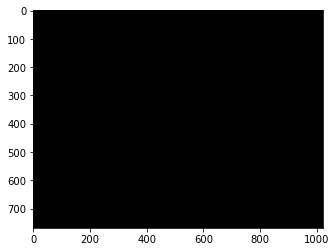

In [53]:
print(f"file size: {os.stat('black_image.png').st_size} bytes")
image = cv2.imread('black_image.png')
print(f"image dims: {image.shape}")
print(f"size in Python: {sys.getsizeof(image)/1024/1024:.2f} Megabytes")
plt.imshow(image)

#### 3) 1024x768 RAW Image

A raw image RGB data for each pixel in the image.

1024 pixels x 768 pixels x (3 colors + 1 alpha) = 3MB

In [13]:
1024*768*4 / 1024 / 1024

3.0

https://toolstud.io/photo/filesize.php?imagewidth=1024&imageheight=768

https://www.circlehd.com/blog/how-to-calculate-video-file-size

#### Daily Twitter Tweets (Uncompressed)  

In [36]:
# 500 Million Tweets at 200 bytes per tweet
# bytes x messagse  /  kilo / mega / giga 
(200 * 500 * 1000000) /1024 / 1024 / 1024 

93.13225746154785

#### Daily Tweets with Scapyy Compression

In [39]:
93 / 1.6

58.125

#### Instagram Photos

995 photos are uploaded on Instagram every second.

In [6]:
995 * 60 * 60 * 24

85968000